In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from plotting_functions import *

prefixes = ["dpp","dth","dph"] #Types of Resolutions
string_selections = ["reco_No_Missing_const_","reco_Missing_const_","reco_NoCuts_"]
#string_selections = ["No_Missing_const_","Missing_const_"]
ylabels = ["dp/p[%]",r"d$\theta$ [mrad]",r"d$\varphi$ [mrad]"]
text_labels = [r'$N_\mathrm{Missed} < 1$',r'$N_\mathrm{Missed} \geq 1$',r'No $N_\mathrm{Missed}$ Cut']
B_Fields = [3.0,1.4]

Cut_String = string_selections[1]
B_Field = B_Fields[1]
out_dir = "./"

fig_name = out_dir+"%1.1fT_"%(B_Field)+Cut_String+"plots.pdf"

In [2]:
mom_binning = np.load('./np_arrays/mom_binning.npy',allow_pickle=True)[()]
eta_binning = np.load('./np_arrays/eta_binning.npy',allow_pickle=True)[()]
N_mom = len(mom_binning["centers"])
N_eta = len(eta_binning["centers"])

eta_colors = get_colors(plt.cm.winter, N_eta)
mom_colors = get_colors(plt.cm.autumn, N_mom)

#### Get Y-Axis range to plot all sublots on same scale

In [3]:
global_ranges = {}
temp_ranges = {}

for s in prefixes:
    for Cut_String in string_selections:
        i=0
        for B_Field in B_Fields:
            
            mom_dict = np.load('./np_arrays/%1.1f%smomentum.npy'%(B_Field,Cut_String),allow_pickle=True)[()]
            mom_ranges = get_ranges_from_dict(mom_dict,[s],"p",N_mom)
            temp_ranges["_%s_%s_%i"%(s,Cut_String,i)] = mom_ranges["%s_max"%(s)]
            temp_ranges["_%s_%s_%i"%(s,Cut_String,i+1)] = mom_ranges["%s_min"%(s)]
            i = i+len(B_Fields)
            
        global_ranges[s+Cut_String] = list(get_ranges_from_dict(temp_ranges,[s+"_"+Cut_String],"",i,False).values())


### Plot

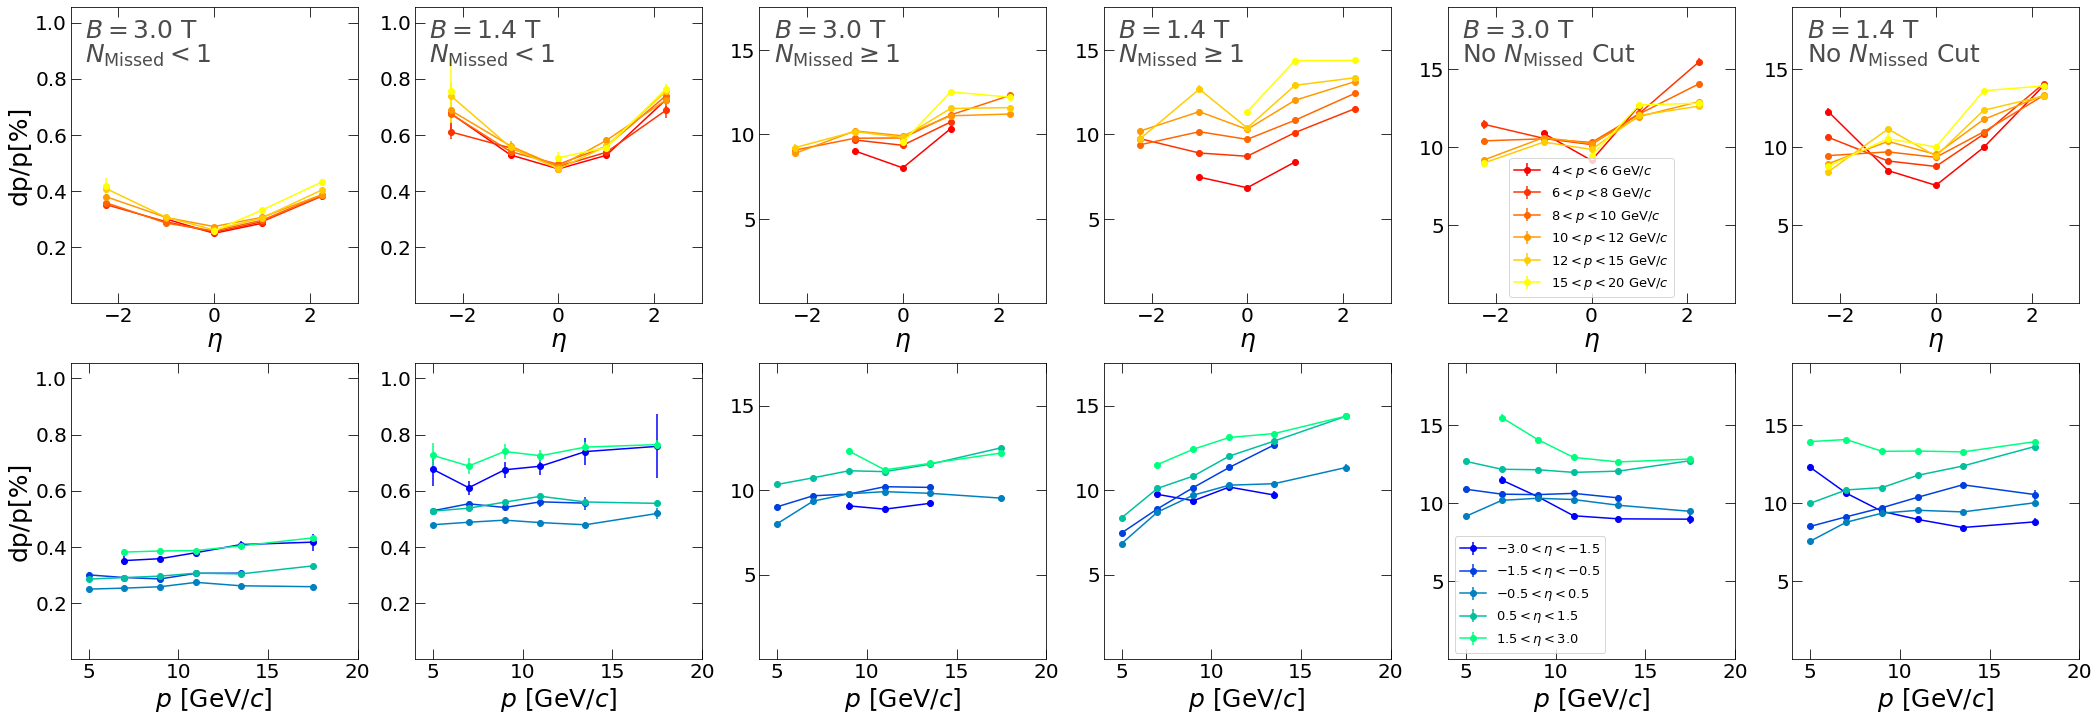

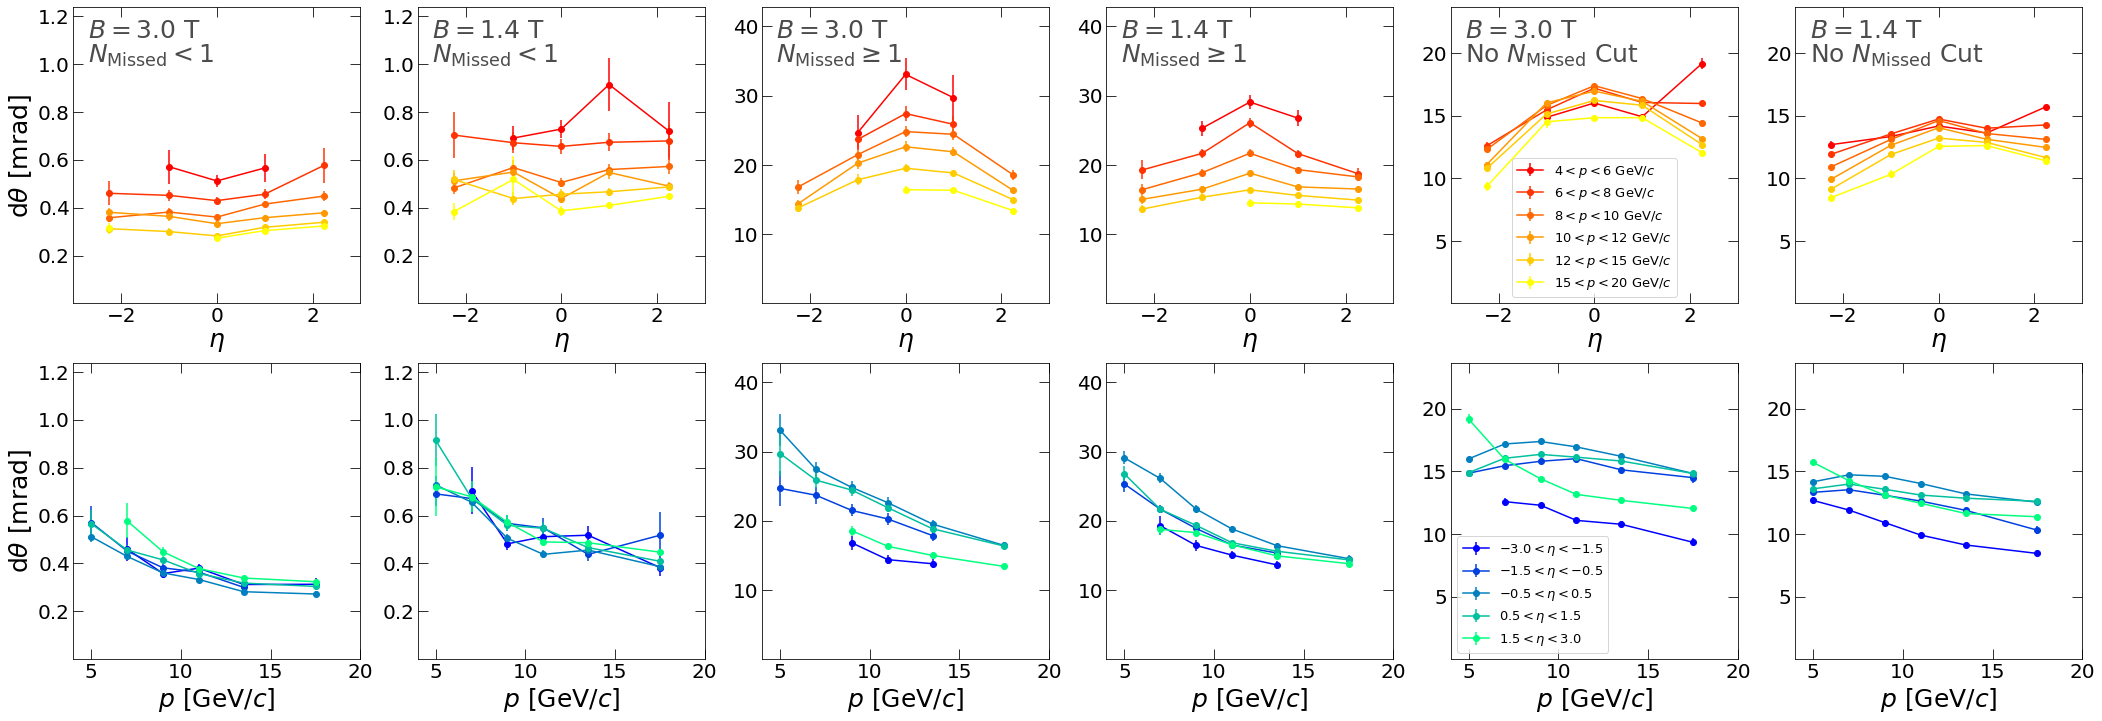

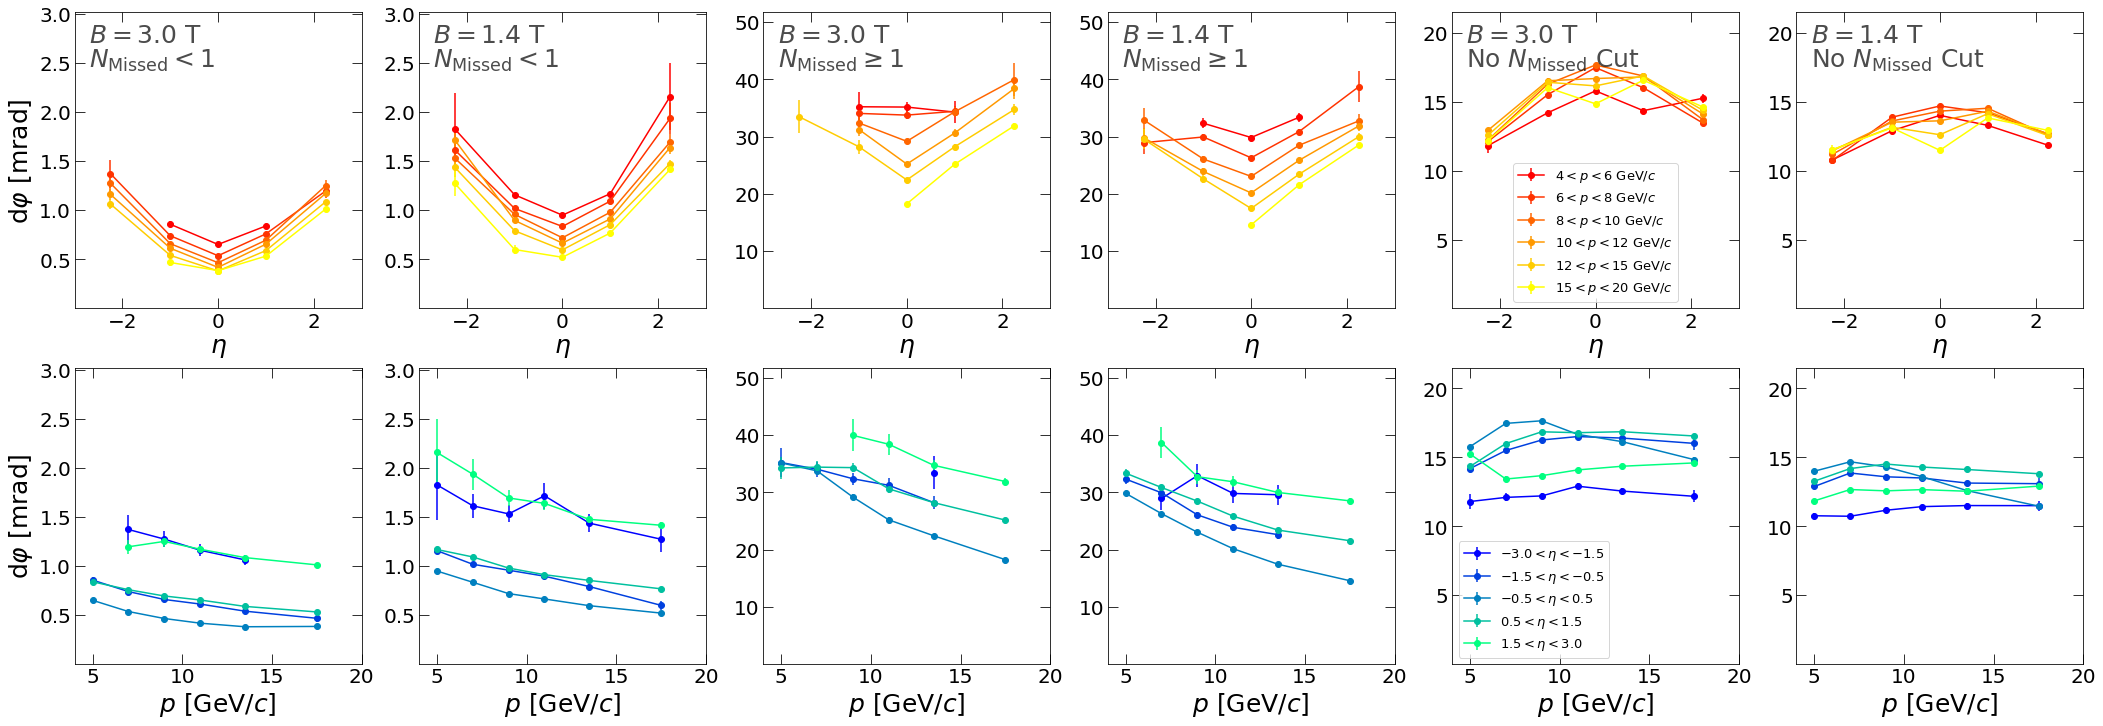

In [4]:
N_divs = 12
fmt = "o-"
tick_leg_size = 20
label_size = 25

for count,s in enumerate(prefixes):
    i = 0
    fig = plt.figure(figsize=(36,12))
    for c,Cut_String in enumerate(string_selections):
        for B_Field in B_Fields:
            
            ax = fig.add_subplot(2,int(N_divs/2),i+1)
            mom_dict = np.load('./np_arrays/%1.1f%smomentum.npy'%(B_Field,Cut_String),allow_pickle=True)[()]
            for p in range(len(mom_binning["centers"])):
                plt.errorbar(eta_binning["centers"],mom_dict["p_%s_%i"%(s,p)],yerr=mom_dict["p_%s_%i_Errors"%(s,p)],
                     fmt=fmt,color = mom_colors[p],label="$%1.0f<p<%1.0f~\mathrm{GeV}/c$"
                     %(mom_binning["edges"][p],mom_binning["edges"][p+1]))
            plt.xlabel(r'$\eta$',fontsize=25,x=0.5)
            plt.xlim(np.min(eta_binning["edges"]),np.max(eta_binning["edges"]))
            plt.ylim(global_ranges[s+Cut_String])
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            plt.text(0.05,.96,r'$B = %1.1f$ T'%(B_Field),ha="left",va="top",size=25,alpha=0.7,transform=ax.transAxes)
            plt.text(0.05,0.88,text_labels[c],ha="left",va="top",size=25,alpha=0.7,transform=ax.transAxes)
            if (i==0): plt.ylabel(ylabels[count],fontsize=label_size)
            if (i==4): plt.legend(fontsize=tick_leg_size-7,loc='lower center')

            ax = fig.add_subplot(2,int(N_divs/2),i+1+6)
            eta_dict = np.load('./np_arrays/%1.1f%srapidity.npy'%(B_Field,Cut_String),allow_pickle=True)[()]
            for eta in range(N_eta):
                plt.errorbar(mom_binning["centers"],eta_dict["eta_%s_%i"%(s,eta)],yerr=eta_dict["eta_%s_%i_Errors"%(s,eta)],
                     fmt=fmt,color = eta_colors[eta],label="$%1.1f<\eta<%1.1f$"
                     %(eta_binning["edges"][eta],eta_binning["edges"][eta+1]))#confusing...
            plt.xlabel(r'$p~\mathrm{[GeV}/c]$',fontsize=25,x=0.5)
            plt.xlim(np.min(mom_binning["edges"]),np.max(mom_binning["edges"]))            
            if i==0: plt.ylabel(ylabels[count],fontsize=label_size)
            plt.ylim(global_ranges[s+Cut_String])
            
            plt.tick_params(which='both',direction='in',right=True,top=True,bottom=True,length=10,labelsize=20)
            if (i==4): plt.legend(fontsize=tick_leg_size-7,loc='lower left')            
            i = i+1
    plt.savefig("grouped_"+s+"resolutions.pdf")